In [1]:
import pandas as pd

def convert_columns(df, columns, new_type):
    for column in columns:
        df[column] = df[column].astype(new_type)
        

def drop_columns(df, columns_to_drop):
    df.drop(columns_to_drop, axis=1, inplace=True)
    
    # delete Nan and zeros 
    to_zero = df.loc[:, 'SiteEUI(kBtu/sf)':'NaturalGas(kBtu)'].columns.tolist()
    df[to_zero] = df[to_zero].fillna(0)
    df = df[df['SiteEnergyUse(kBtu)'] != 0]
    return df

def convert(df, convert_to_float, convert_to_int):
    convert_columns(df=df, columns=convert_to_float, new_type=float)
    convert_columns(df=df, columns=convert_to_int, new_type=int)
    return df

def rename(df, columns_to_rename):
    df.rename(columns=columns_to_rename, inplace=True)
    return df

def sort_columns(df, columns_order):
    df = df[columns_order]
    return df

In [2]:
from columns_order import fixed_columns_order
columns_order = fixed_columns_order

# 2020

In [3]:
# fixed order of columns for all data is saved in columns_order.py

path_20 = 'data/raw/2020_Building_Energy_Benchmarking.csv'

columns_to_drop_20 = [
    'TaxParcelIdentificationNumber',
    'City', 
    'State', 
    'PropertyGFABuilding(s)', 
    'LargestPropertyUseType', 
    'LargestPropertyUseTypeGFA', 
    'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFA', 
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA', 
    'EPAPropertyType',
    'ComplianceIssue',
    'ComplianceStatus'
]

convert_to_float_20 = [
    'Latitude', 
    'Longitude',
    'ZipCode'
]

convert_to_int_20 = [
    'SiteEnergyUse(kBtu)',
    'SiteEnergyUseWN(kBtu)',
    'Electricity(kBtu)',
    'NaturalGas(kBtu)'
]

columns_to_rename_20 = {
    'BuildingName': 'PropertyName',
    'TotalGHGEmissions': 'GHGEmissions(MetricTonsCO2e)',
    'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)'
}

columns_to_add_20 = [
    'YearsENERGYSTARCertified',
    'PrimaryPropertyType'
]

In [4]:
sea_2020 = pd.read_csv(path_20)
sea_2020 = drop_columns(sea_2020, columns_to_drop_20)
sea_2020 = convert(sea_2020, convert_to_float_20, convert_to_int_20)
sea_2020 = rename(sea_2020, columns_to_rename_20)
sea_2020[[columns_to_add_20]] = None
sea_2020 = sort_columns(sea_2020, columns_order)

sea_2020.to_csv('data/clean/2020-building-energy-benchmarking-clean.csv', index=False)

# 2019

In [5]:
path_19 = 'data/raw/2019_Building_Energy_Benchmarking.csv'

columns_to_drop_19 = [
    'TaxParcelIdentificationNumber',
    'City', 
    'State', 
    'PropertyGFABuilding(s)', 
    'LargestPropertyUseType', 
    'LargestPropertyUseTypeGFA', 
    'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFA', 
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA', 
    'EPAPropertyType',
    'ComplianceIssue',
    'ComplianceStatus'
]

convert_to_float_19 = [
    'Latitude', 
    'Longitude',
    'ZipCode'
]

convert_to_int_19 = [
    'SiteEnergyUse(kBtu)',
    'SiteEnergyUseWN(kBtu)',
    'Electricity(kBtu)',
    'NaturalGas(kBtu)'
]

columns_to_rename_19 = {
    'BuildingName': 'PropertyName',
    'TotalGHGEmissions': 'GHGEmissions(MetricTonsCO2e)',
    'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)'
}

columns_to_add_19 = [
    'NumberofBuildings',
    'YearsENERGYSTARCertified',
]

In [6]:
sea_2019 = pd.read_csv(path_19)
sea_2019 = drop_columns(sea_2019, columns_to_drop_19)
sea_2019 = convert(sea_2019, convert_to_float_19, convert_to_int_19)
sea_2019 = rename(sea_2019, columns_to_rename_19)
sea_2019[[columns_to_add_19]] = None
sea_2019 = sort_columns(sea_2019, columns_order)

sea_2019.to_csv('data/clean/2019-building-energy-benchmarking-clean.csv', index=False)

# 2015 

In [8]:
import ast
path_15 = 'data/raw/2015_Building_Energy_Benchmarking.csv'

sea_2015 = pd.read_csv(path_15)

### Extarcting address data
We need to extract latitude, longitude, address and zip from this dict-like column

In [9]:
print(sea_2015['Location'][0])

{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}


In [10]:
# creating dictionary from a string in "Location" column
sea_2015['Location'] = sea_2015['Location'].apply(ast.literal_eval)
sea_2015['Location'][0]

{'latitude': '47.61219025',
 'longitude': '-122.33799744',
 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}

In [11]:
# creating 'latitude' and 'longitude' columns from the dictionary
location = pd.json_normalize(sea_2015['Location'])
location.head()

,latitude,longitude,human_address
0,47.61219025,-122.33799744,"{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
1,47.61310583,-122.33335756,"{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
2,47.61334897,-122.33769944,"{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
3,47.61421585,-122.33660889,"{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
4,47.6137544,-122.3409238,"{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}"


In [12]:
# do the same operations for "Human_address" column
location['human_address'] = location['human_address'].apply(ast.literal_eval)
address = pd.json_normalize(location['human_address'])
address.head()

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121


In [13]:
# inserting new columns in a fixed order
sea_2015.insert(loc=5, column='Address', value=address['address'])
sea_2015.insert(loc=6, column='ZipCode', value=address['zip'])
sea_2015.insert(loc=9, column='Latitude', value=location['latitude'])
sea_2015.insert(loc=10, column='Longitude', value=location['longitude'])

In [14]:
columns_to_drop_15 =  [
    'TaxParcelIdentificationNumber',
    'Location',
    'PropertyGFABuilding(s)',
    'ListOfAllPropertyUseTypes',
    'LargestPropertyUseType', 
    'LargestPropertyUseTypeGFA', 
    'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFA', 
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA', 
    'OtherFuelUse(kBtu)',
    'DefaultData',
    'Comment',
    'ComplianceStatus',
    'Outlier',
    '2010 Census Tracts',
    'Seattle Police Department Micro Community Policing Plan Areas',
    'City Council Districts',
    'SPD Beats',
    'Zip Codes'    
]

convert_to_float_15 = [
    'Latitude', 
    'Longitude',
    'ZipCode'
]

convert_to_int_15 = [
    'SiteEnergyUse(kBtu)',
    'SiteEnergyUseWN(kBtu)',
    'SteamUse(kBtu)',
    'Electricity(kBtu)',
    'Electricity(kWh)',
    'NaturalGas(kBtu)',
    'NaturalGas(therms)'
]

In [15]:
sea_2015 = drop_columns(sea_2015, columns_to_drop_15)
sea_2015 = convert(sea_2015, convert_to_float_15, convert_to_int_15)
sea_2015 = sort_columns(sea_2015, columns_order)

sea_2015.to_csv('data/clean/2015-building-energy-benchmarking-clean.csv', index=False)

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [39]:
sea = pd.read_csv('data/ALL_YEARS_building-energy-benchmarking-clean.csv')

In [43]:
sea_plot = sea[['DataYear', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',  'ENERGYSTARScore',
                'SiteEUIWN(kBtu/sf)', 'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 
                'GHGEmissionsIntensity(kgCO2e/ft2)'
                ]]

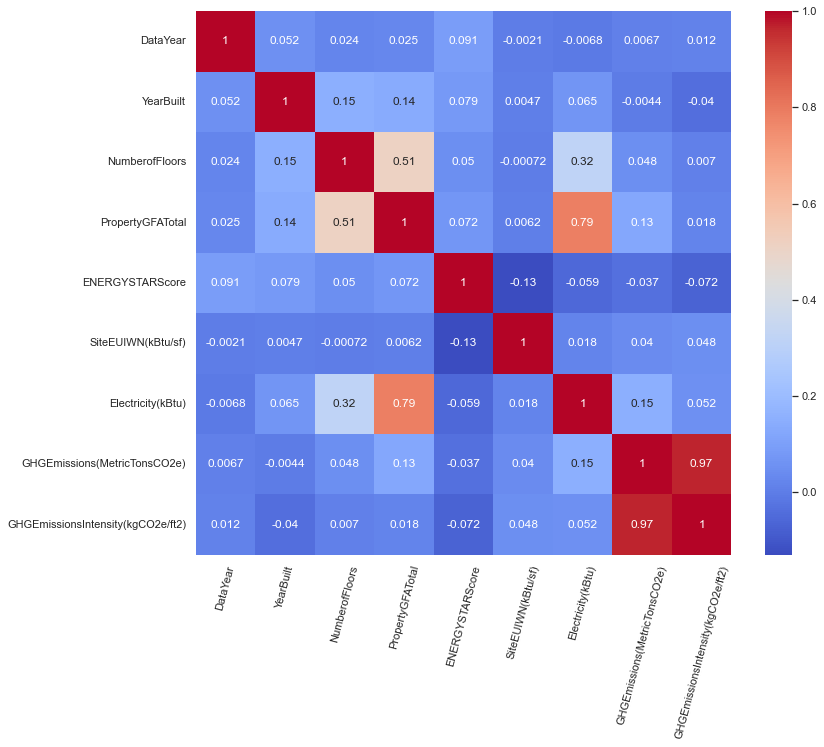

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(sea_plot.corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=75)
plt.show()